## <font color='darkblue'>Preface</font>
(go/mlclass-colab-mnist) This Colab explore multi-class classification problems through the classic MNIST dataset.

<a id='sect0'></a>
### <font color='darkgreen'>Learning Objectives:</font>

After doing this Colab, you'll know how to do the following:

  * <font size='3ptx'><b><a href='#sect1'>Understand the classic MNIST problem.</a></b></font>
  * <font size='3ptx'><b><a href='#sect2'>Create a deep neural network that performs multi-class classification.</a></b></font>
  * <font size='3ptx'><b><a href='#sect3'>Tune the deep neural network.</a></b></font>

This exercise introduces image classification with machine learning.

### <font color='darkgreen'>Call the import statements</font>
The following code imports the necessary modules.

In [3]:
#!pip install tensorflow

In [25]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

<a id='sect1'></a>
## <font color='darkblue'>The Dataset</font>
* <font size='3ptx'><b><a href='#sect1_1'>Load the dataset</a></b></font>
* <font size='3ptx'><b><a href='#sect1_2'>View the dataset</a></b></font>
* <font size='3ptx'><b><a href='#sect1_3'>Task 1: Normalize feature values</a></b></font>
* <font size='3ptx'><b><a href='#sect1_4'>Define a plotting function</a></b></font>
<br/>

This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized). 

![MNIST data images](images/day2-3_i1.PNG)

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes, one for each digit.

<a id='sect1_1'></a>
### <font color='darkgreen'>Load the dataset</font>

`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called <a href='https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data'>`mnist.load_data()`</a>:

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [13]:
X_train.shape

(60000, 28, 28)

Notice that `mnist.load_data()` returned four separate values:

* `x_train` contains the training set's features.
* `y_train` contains the training set's labels.
* `x_test` contains the test set's features.
* `y_test` contains the test set's labels.

<font color='darkred'>**Note:**</font> The MNIST .csv training set is already shuffled.

<a id='sect1_2'></a>
### <font color='darkgreen'>View the dataset</font>

The .csv file for the California Housing Dataset contains column names (<font color='brown'>for example, `latitude`, `longitude`, `population`</font>). By contrast, the .csv file for MNIST does not contain column names. Instead of column names, you use ordinal numbers to access different subsets of the MNIST dataset. In fact, it is probably best to think of `x_train` and `x_test` as three-dimensional NumPy arrays:  

In [8]:
# Output example #2917 of the training set.
X_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

Alternatively, you can call [`matplotlib.pyplot.imshow`](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.imshow.html) to interpret the preceding numeric array as an image. 

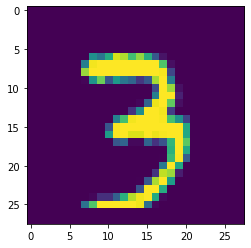

In [9]:
# Use false colors to visualize the array.
plt.imshow(X_train[2917])

In [10]:
# Output row #10 of example #2917.
X_train[2917][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [11]:
# Output pixel #16 of row #10 of example #2900.
X_train[2917][10][16]

58

<a id='sect1_3'></a>
### <font color='darkgreen'>Task 1: Normalize feature values</font>

Complete the following code cell to map each feature value from its current representation (<font color='brown'>an integer between 0 and 255</font>) to a floating-point value between 0 and 1.0. Store the floating-point values in `x_train_normalized` and `x_test_normalized`.

In [16]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0
print(X_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


<a id='sect1_4'></a>
### <font color='darkgreen'>Define a plotting function</font> ([back](#sect1))
The following function plots an accuracy curve:

In [38]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  
  plt.rcParams['figure.figsize'] = [8, 4]
  plt.figure()  
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


<a id='sect2'></a>
## <font color='darkblue'>Create a deep neural net model</font>
The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of [layers](https://developers.google.com/machine-learning/glossary/#layer) in the deep neural net.
* The number of [nodes](https://developers.google.com/machine-learning/glossary/#node) in each layer.
* Any [regularization](https://developers.google.com/machine-learning/glossary/#regularization) layers.

The `create_model` function also defines the [activation function](https://developers.google.com/machine-learning/glossary/#activation_function) of each layer.  The activation function of the output layer is [softmax](https://developers.google.com/machine-learning/glossary/#softmax), which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.

<font color='darkred'>**Note:**</font> Unlike several of the recent Colabs, this exercise does not define feature columns or a feature layer.  Instead, the model will train on the NumPy array.

In [21]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split,
                      verbose=0)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

### <font color='darkgreen'>Invoke the previous functions</font>

Run the following code cell to invoke the preceding functions and actually train the model on the training set. 

<font color='darkred'>**Note:**</font> Due to several factors (<font color='brown'>for example, more examples and a more complex neural network</font>) training MNIST might take longer than training the California Housing Dataset. Be patient.


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 4ms/step - loss: 0.1397 - accuracy: 0.9579
Loss=0.14; accuracy=0.96
CPU times: user 32.6 s, sys: 2.6 s, total: 35.2 s
Wall time: 7.72 s


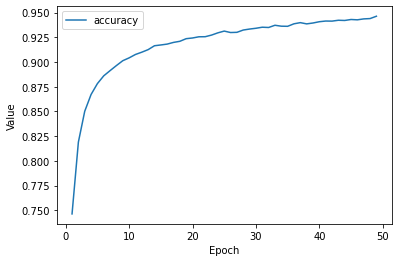

In [28]:
%%time
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, X_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
loss, accuracy = my_model.evaluate(x=X_test_normalized, y=y_test, batch_size=batch_size)
print(f'Evaluation result: Loss={loss:.02f}; accuracy={accuracy:.02f}')

<a id='sect3'></a>
## <font color='darkblue'>Task 2: Optimize the model</font> ([back](#sect0))

Experiment with the following:

* number of hidden layers 
* number of nodes in each layer
* dropout regularization rate

What trends did you discover?  Can you reach at least 98% accuracy against the test set? 
> It would take much too long to experiment 
> fully with topography and dropout regularization 
> rate. In the real world, you would
> also experiment with learning rate, batch size, 
> and number of epochs.  Since you only have a 
> few minutes, searching for trends can be helpful.
> Here is what we discovered:
>   * Adding more nodes (<font color='brown'>at least until 256 nodes</font>) 
>     to the first hidden layer improved accuracy.
>   * Adding a second hidden layer generally 
>     improved accuracy.
>   * When the model contains a lot of nodes, 
>     the model overfits unless the dropout rate 
>     is at least 0.5. 
> <br/><br/>
> <b>We reached 98% test accuracy with the 
> following configuration:</b>
>   * One hidden layer of 256 nodes; no second 
>     hidden layer.
>   * dropout regularization rate of 0.4
> <br/><br/>
> <b>We reached 98.2% test accuracy with the 
> following configuration:</b>
>   * First hidden layer of 256 nodes; 
>     second hidden layer of 128 nodes.
>   * dropout regularization rate of 0.2

In [56]:
def my_optimized_model(learning_rate):
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  
  # Define the second hidden layer.   
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  
  # Define the third hidden layer.   
  # model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 8ms/step - loss: 0.0891 - accuracy: 0.9807
Evaluation result: Loss=0.09; accuracy=98.1
CPU times: user 56.4 s, sys: 2.13 s, total: 58.5 s
Wall time: 8.19 s


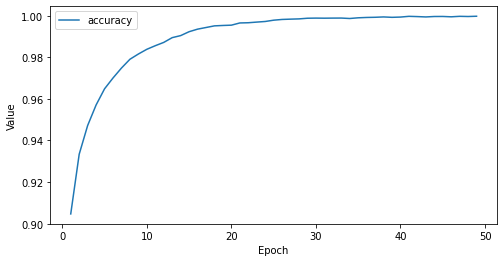

In [61]:
%%time
# The following variables are the hyperparameters.
learning_rate = 0.004
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
optimized_model = my_optimized_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(optimized_model, X_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
loss, accuracy = optimized_model.evaluate(x=X_test_normalized, y=y_test, batch_size=batch_size)
print(f'Evaluation result: Loss={loss:.02f}; accuracy={accuracy*100:.01f}')